### IMPORTING PYTHON LIBRARIES

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from matplotlib.ticker import NullFormatter
%matplotlib inline
import seaborn as sns


In [6]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-04-12 06:40:02--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-04-12 06:40:02 (13.0 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [11]:
df = pd.read_csv('loan_train.csv')
df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [13]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [14]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

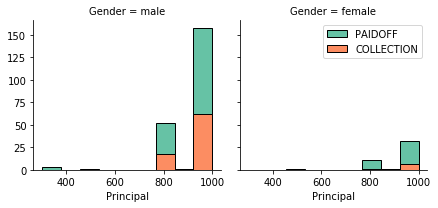

In [20]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
graph = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=3)
graph.map(plt.hist, 'Principal', bins=bins, ec="k")

graph.axes[-1].legend()
plt.show()

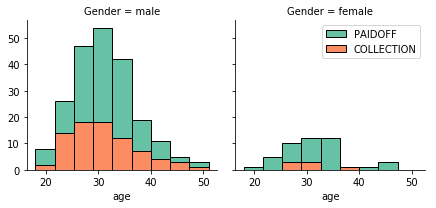

In [22]:

bins = np.linspace(df.age.min(), df.age.max(), 10)
graph = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=3)
graph.map(plt.hist, 'age', bins=bins, ec="k")

graph.axes[-1].legend()
plt.show()

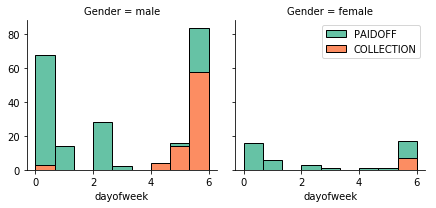

In [25]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
graph = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=3)
graph.map(plt.hist, 'dayofweek', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()

In [26]:

df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [27]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)


Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [28]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [30]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)
df[['Principal','terms','age','Gender','education']].head()


,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [31]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [34]:
x = Feature
x[0:5]
print(x)
y = df['loan_status'].values
y[0:5]
print(y)

     Principal  terms  age  Gender  weekend  Bechalor  High School or Below  \
0         1000     30   45       0        0         0                     1   
1         1000     30   33       1        0         1                     0   
2         1000     15   27       0        0         0                     0   
3         1000     30   28       1        1         0                     0   
4         1000     30   29       0        1         0                     0   
5         1000     30   36       0        1         0                     0   
6         1000     30   28       0        1         0                     0   
7          800     15   26       0        1         0                     0   
8          300      7   29       0        1         0                     0   
9         1000     15   39       0        1         0                     1   
10        1000     30   26       0        1         0                     0   
11         900      7   26       1        1         

In [35]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# K NEAREST NEIGHBOUR (KNN)

In [41]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split( x, y, test_size=0.2, random_state=1)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import f1_score

In [42]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_trainset,y_trainset)
    knn_pred=neigh.predict(X_testset)
    mean_acc[n-1] = metrics.accuracy_score(y_testset, knn_pred)
    std_acc[n-1]=np.std(knn_pred==y_testset)/np.sqrt(knn_pred.shape[0])
    #print("f1-score :: ",f1_score( y_testset, knn_pred, average='weighted'))

print(mean_acc)
knnbest = mean_acc.argmax()+1
print("Best Accuracy is with neighbor ",knnbest)
print("Best Accuracy is ",mean_acc.max())

print("")
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
neigh = KNeighborsClassifier(n_neighbors = 7).fit(X_trainset,y_trainset)
knn_pred=neigh.predict(X_testset)
print("F1-SCORE:: ",f1_score( y_testset, knn_pred, average='weighted'))
print("JACCARD SIMILARITY SCORE:: ",jaccard_similarity_score(y_testset, knn_pred))

[0.6        0.47142857 0.67142857 0.57142857 0.68571429 0.61428571
 0.7        0.65714286 0.67142857]
Best Accuracy is with neighbor  7
Best Accuracy is  0.7

F1-SCORE::  0.6318840579710147
JACCARD SIMILARITY SCORE::  0.7


# DECISION TREE

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [44]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=1)
print("X-trainset-shape:: ", X_trainset.shape)
print("Y-trainset-shape:: ", y_trainset.shape)


X-trainset-shape::  (242, 8)
Y-trainset-shape::  (242,)


In [45]:
loanTree = DecisionTreeClassifier(criterion="entropy",max_depth=6)
loanTree.fit(X_trainset,y_trainset)
predTree = loanTree.predict(X_testset)

print ("PREDICTED -- >", predTree [0:10])
print ("ACTUAL --> ", y_testset [0:10])

PREDICTED -- > ['COLLECTION' 'PAIDOFF' 'COLLECTION' 'COLLECTION' 'COLLECTION'
 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
ACTUAL -->  ['COLLECTION' 'COLLECTION' 'COLLECTION' 'PAIDOFF' 'COLLECTION'
 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [46]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7019230769230769


In [49]:
print("Jaccard index: ",(jaccard_similarity_score( y_testset, predTree)))

Jaccard index:  0.7019230769230769


In [50]:
print("F1 Score: ",f1_score( y_testset, predTree, average='weighted'))

F1 Score:  0.7111756168359944


# SUPPORT  VECTOR MACHINE (SVM)

In [57]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split( X, y, test_size=0.2, random_state=1)

from sklearn import svm

knls = ['linear', 'rbf', 'sigmoid']
mean_accuracy = np.zeros((len(knls)))
for kernel in knls:
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_trainset, y_trainset)
    svm_predict = clf.predict(X_testset)
    mean_accuracy[knls.index(kernel)] = metrics.accuracy_score(y_testset, svm_predict)

print( "The best accuracy was :: ", mean_accuracy.max())

The best accuracy was ::  0.7428571428571429


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [65]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split( X, y, test_size=0.2, random_state=4)

from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_trainset, y_trainset) 

svm_pred = clf.predict(X_testset)
svm_pred [0:5]

from sklearn.metrics import jaccard_similarity_score
print("Jaccard Index: ",jaccard_similarity_score(y_testset, svm_pred))
print("F1-score: ",f1_score(y_testset, svm_pred, average='weighted'))


Jaccard Index:  0.7428571428571429
F1-score:  0.7275882012724117


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# LOGISTIC REGRESSION

In [59]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_trainset.shape,  y_trainset.shape)
print ('Test set:', X_testset.shape,  y_testset.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [60]:
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainset,y_trainset)
LR
lr_predict = LR.predict(X_testset)
lr_predict

from sklearn.metrics import jaccard_similarity_score
print("Jaccard Score :: ",jaccard_similarity_score(y_testset, lr_predict) )


from sklearn.metrics import f1_score
print("F1 Score :: ",f1_score(y_testset, lr_predict, average='weighted'))

Jaccard Score ::  0.6857142857142857
F1 Score ::  0.6670522459996144


In [62]:
lr_prob = LR.predict_proba(X_testset)
from sklearn.metrics import log_loss
print("LOG-LOSS: ",log_loss(y_testset, lr_prob))

LOG-LOSS:  0.5772287609479654


#                                                 Final Results:





| ALGORITHM USED | Jaccard Index | F1-Score | Log-Loss |
| --- | --- | --- | --- |
| KNN | 0.7 | 0.63 | NA |
| LogisticRegression | 0.68 | 0.66 | 0.57 |
| SVM | 0.74 | 0.72 | NA |
| Decision | 0.70 | 0.71 | NA |

